<a href="https://colab.research.google.com/github/Sebastian93BC/Visualizacion-AG/blob/main/08MBIDAG3SebastianBustos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ACTIVIDAD GUIADA III
- JUAN SEBASTIÁN BUSTOS-CORDERO
- MÁSTER EN BIG DATA Y CIENCIA DE DATOS
- 08MBID VISUALIZACIÓN DE DATOS
- FECHA: 04/11/2022

In [ ]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [ ]:
#Cargamos el data set de los pasajeros del Titanic
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
#Renombra la columna class=clase y fare=tarifa
titanic.rename(columns={'class': 'clase'},
inplace=True)
titanic.rename(columns={'fare': 'tarifa'},
inplace=True)


In [ ]:
#Muestra los valores distintos para class(clase)
titanic.clase.unique()


array(['Third', 'First', 'Second'], dtype=object)

In [ ]:
#Añadimos nuevas columnas: is_old, is_baby
###############################################
def is_old_func(row):
  return row['age'] > 60
  
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
#Otra forma de definir una nueva columna
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


In [ ]:
#Define una variable numérica: class_num
def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]
titanic['class_num'] = titanic.apply(class_num_func, axis='columns')


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [ ]:
#Consulta con condiciones
titanic[
  (titanic.sex == 'female')
  & (titanic['clase'].isin(['First', 'Third']))
  & (titanic.age > 45 )
  & (titanic.survived == 0)
  ]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


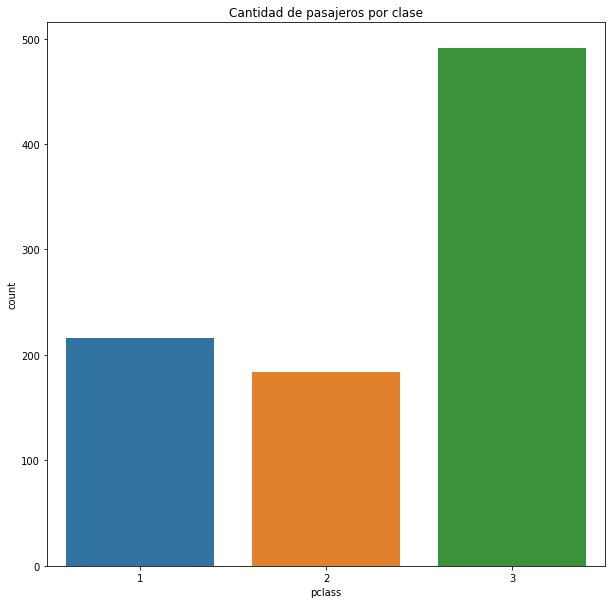

In [ ]:
#Distribución de las clases
plt.figure(figsize=(10,10))
plt.title("Cantidad de pasajeros por clase")
plt.xlabel(
    'Clase')
plt.ylabel(
    'Cantidad')
sns.countplot(x="pclass", data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


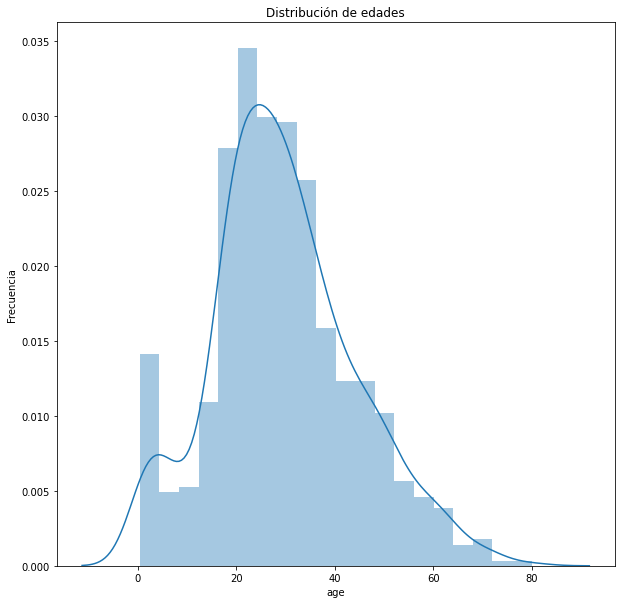

In [ ]:
#Distribución de la edad(ege)
plt.figure(figsize=(10,10))
plt.title("Distribución de edades")
plt.xlabel('edad')
plt.ylabel('Frecuencia')
sns.distplot(titanic.age.dropna( ))
plt.show( )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x720 with 0 Axes>

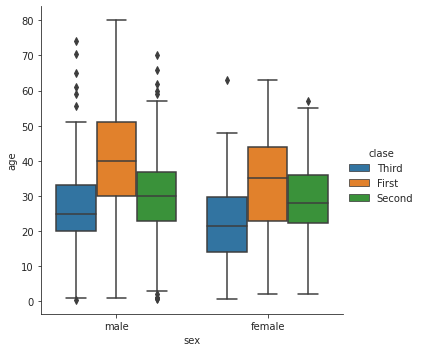

<Figure size 720x720 with 0 Axes>

In [ ]:
#BoxPlot de la edad por sexo y clase


with sns.axes_style(style='ticks'):
  ax = sns.catplot("sex", "age", "clase" ,
  data=titanic, kind="box")


<Figure size 720x720 with 0 Axes>

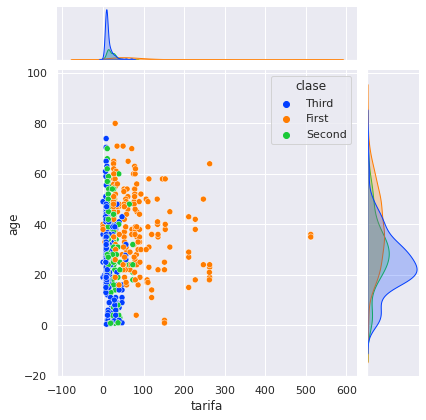

In [ ]:
#Distribución cruzada de Edad y Tarifa
plt.figure(figsize=(10,10))
plt.tittle = "Distribución de la edad y tarifa"
sns.jointplot(
    data=titanic,
    x='tarifa', 
    y='age',
    palette='bright',
    hue = 'clase'
    )

<Figure size 720x720 with 0 Axes>

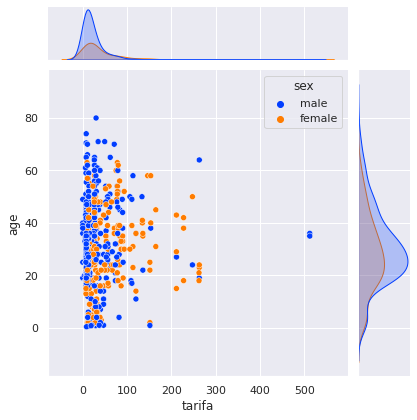

In [ ]:
#Distribución cruzada de Edad y Tarifa
plt.figure(figsize=(10,10))
plt.tittle = "Distribución de la edad y tarifa"
sns.jointplot(
    data=titanic,
    x='tarifa', 
    y='age',
    palette='bright',
    hue = 'sex'
    )

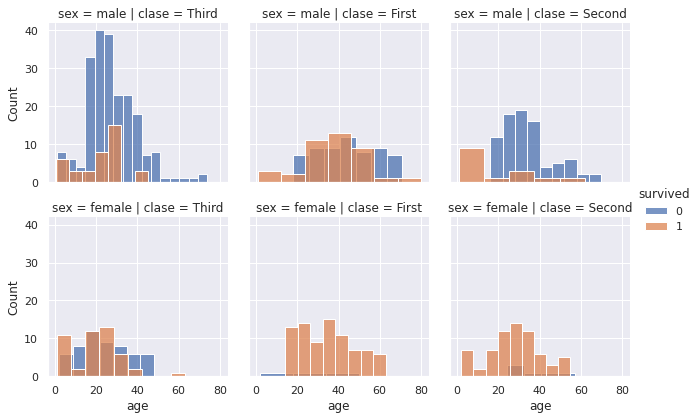

In [59]:
#Cambiamos el font
sns.set(font_scale=1)
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='sex',col='clase',hue='survived')
g.map(sns.histplot, "age")
g.add_legend()
plt.show()

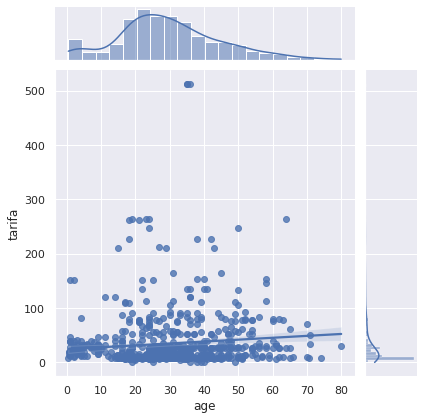

In [ ]:
#Diagrama de dispersion con Distribucion de cadavariable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa',
kind='reg', color='b')
plt.show()

Text(0.5, 1.0, 'titanic.corr()')

<Figure size 720x720 with 0 Axes>

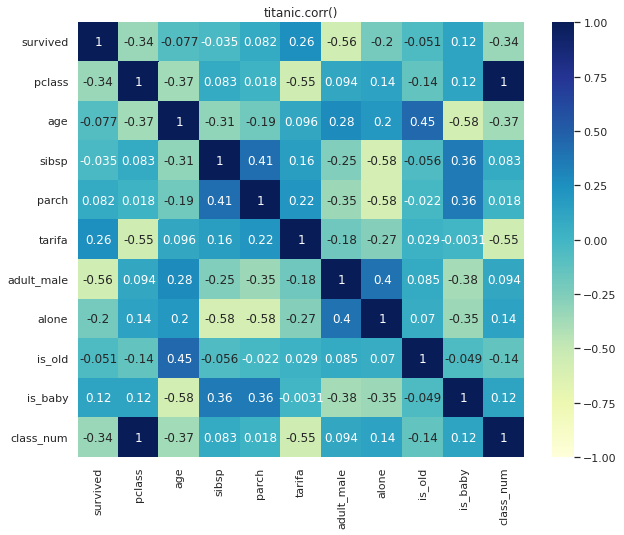

In [ ]:
# Mapa de calor de correlaciones
tc = titanic.corr()
plt.figure(figsize=(10,8))
sns.heatmap(tc, cmap='YlGnBu',annot=True,
    vmin=-1, vmax=1)
plt.title('titanic.corr()')

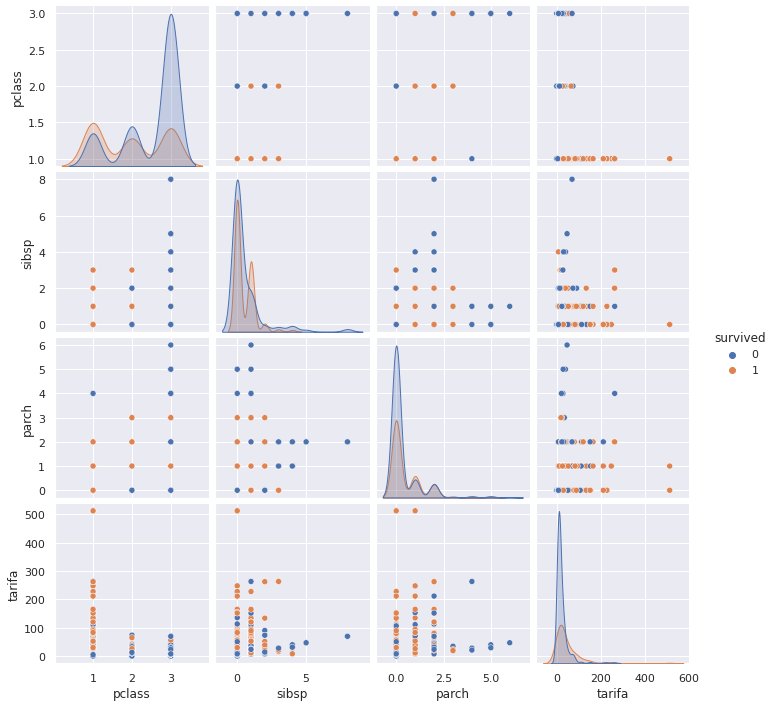

<Figure size 720x720 with 0 Axes>

In [ ]:
#Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]
#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.figure(figsize=(10,10))
plt.show()